### Training Pipeline

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler


#### Loadin data

In [73]:
data = pd.read_csv("../data/diamonds_train.csv")

In [74]:
data.head()

,index_id,price,city_id,carat,city_id.1,city,index_id.1,depth,table,x,...,index_id.2,cut_id,color_id,clarity_id,clarity_id.1,clarity,color_id.1,color,cut_id.1,cut
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,...,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,6da43b944e494e885e69af021f93c6d9331c78aa228084...,J,de88c121a82a06352bf1aaceba20578356408a334ba046...,Premium
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,89c7286890f7347ab235234e74d406596a127ae3679042...,0.32,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,...,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,H,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,Very Good
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,0.71,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,Las Vegas,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,...,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,VS1,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,Fair
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,89c7286890f7347ab235234e74d406596a127ae3679042...,0.41,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,...,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,D,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,Good
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,...,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,Ideal


In [75]:
data = data[['carat',
             'cut', 
             'color', 
             'clarity', 
             'depth', 
             'table', 
             'x', 
             'y', 
             'z', 
             'price']]
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,4268
1,0.32,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75,505
2,0.71,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65,2686
3,0.41,Good,D,SI1,63.8,56.0,4.68,4.72,3.00,738
4,1.02,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95,4882


#### Feature engineering

- Creamos feature __size__

In [92]:
data["size"] = data["x"] * data["y"] * data["z"]
data

KeyError: 'x'

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  int64  
 10  size     40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


#### Feature engineering

- Eliminamos columnas __x__, __y__, __z__

In [78]:
data = data[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'size']]
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   size     40455 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.5+ MB


#### Encoding cat features

- Label encoding

In [79]:
cut_new = {
    "Fair" : 10,
    "Good" : 20,
    "Very Good" : 30,
    "Premium" : 40,
    "Ideal" : 50,
}

In [80]:
data['cut'].replace(cut_new,inplace=True)

/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_84697/18869081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cut'].replace(cut_new,inplace=True)


In [81]:
color_new = {
    "D" : 70,
    "E" : 60,
    "F" : 50,
    "G" : 40,
    "H" : 30,
    "I" : 20,
    "J" : 10,
}

In [82]:
data['color'].replace(color_new,inplace=True)

/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_84697/4005428248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'].replace(color_new,inplace=True)


In [83]:
new_clarity = { "I1" : 10,
    "SI2" : 20,
    "SI1" : 30,
    "VS2" : 40,
    "VS1" : 50,
    "VVS2" : 60,
    "VVS1" : 70,
    "IF" : 80,}

In [84]:
data['clarity'].replace(new_clarity,inplace=True)

/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_84697/751121962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clarity'].replace(new_clarity,inplace=True)


In [85]:
data

,carat,cut,color,clarity,depth,table,price,size
0,1.21,40,10,40,62.4,58.0,4268,197.096725
1,0.32,30,30,40,63.0,57.0,505,52.395750
2,0.71,10,40,50,65.5,55.0,2686,113.436890
3,0.41,20,70,30,63.8,56.0,738,66.268800
4,1.02,50,40,30,60.5,59.0,4882,168.429975
...,...,...,...,...,...,...,...,...
40450,1.34,50,40,50,62.7,57.0,10070,221.429120
40451,2.02,20,50,20,57.1,60.0,12615,324.276975
40452,1.01,50,30,30,62.7,56.0,5457,163.990554
40453,0.33,50,10,50,61.9,54.3,456,54.900540


#### One hot enconding

- Alternativa a label encoding

In [15]:
#data = pd.get_dummies(data, drop_first=True)
#data

#### Scaling

- Robust scaler

In [16]:
# Using scikit-learn .RobustScaler()

#scaler = RobustScaler()
#scaled_data = scaler.fit_transform(data)
#scaled_data

In [17]:
#scaled_dataframe = pd.DataFrame(scaled_data, columns=data.columns)
#scaled_dataframe

#### Train, test, split

In [86]:

X = data.drop('price', axis=1)
y = data['price'] 
# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")


X_train: (32364, 7), X_test: (8091, 7), y_train: (32364,), y_test: (8091,)


In [19]:
#regressor = SGDRegressor()

In [20]:
'''
hyperparameters = regressor.get_params()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Model:', regressor, '\n')
print('Model hyperparameters:', hyperparameters, '\n')
#print('Model coefficients:', regressor.coef_, '\n')
#print('Model feature importance:', regressor.feature_importances_)
print('Ground truth target:', y_test, '\n')
print('Predicted target:', y_pred, '\n')
'''

"\nhyperparameters = regressor.get_params()\nregressor.fit(X_train, y_train)\ny_pred = regressor.predict(X_test)\n\nprint('Model:', regressor, '\n')\nprint('Model hyperparameters:', hyperparameters, '\n')\n#print('Model coefficients:', regressor.coef_, '\n')\n#print('Model feature importance:', regressor.feature_importances_)\nprint('Ground truth target:', y_test, '\n')\nprint('Predicted target:', y_pred, '\n')\n"

# Otro modelo  TreeRegressor


In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [89]:
# Make predictions on the test set
predictions = decision_tree_model.predict(X_test)

In [90]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 523552.23557725316
R-squared: 0.9678502423757699


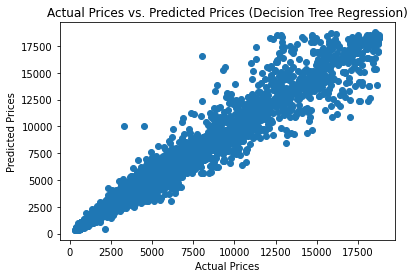

In [91]:
# Visualize predictions against actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Decision Tree Regression)')
plt.show()

In [40]:
# MSE calculation

#mean_squared_error(y_test, y_pred)

In [42]:
# RMSE calculation

#rmse = mean_squared_error(y_test, y_pred, squared=False)
#rmse

# Examinamos train

In [44]:
data = pd.read_csv("../data/diamonds_test.csv")

In [46]:
data = data[['carat',
             'cut', 
             'color', 
             'clarity', 
             'depth', 
             'table', 
             'x', 
             'y', 
             'z']]
data.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67
1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18
2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57
3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90
4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19


In [47]:
data["size"] = data["x"] * data["y"] * data["z"]
data

/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_84697/3453879742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["size"] = data["x"] * data["y"] * data["z"]


,carat,cut,color,clarity,depth,table,x,y,z,size
0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,125.806866
1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,196.129362
2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,246.878712
3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,145.593630
4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,81.997355
...,...,...,...,...,...,...,...,...,...,...
13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,93.924600
13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,116.477148
13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,115.898725
13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45,118.874925


In [49]:
data = data[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'size']]
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    13485 non-null  float64
 1   cut      13485 non-null  object 
 2   color    13485 non-null  object 
 3   clarity  13485 non-null  object 
 4   depth    13485 non-null  float64
 5   table    13485 non-null  float64
 6   size     13485 non-null  float64
dtypes: float64(4), object(3)
memory usage: 737.6+ KB


In [50]:
cut_new = {
    "Fair" : 10,
    "Good" : 20,
    "Very Good" : 30,
    "Premium" : 40,
    "Ideal" : 50,
}
data['cut'].replace(cut_new,inplace=True)

color_new = {
    "D" : 700,
    "E" : 600,
    "F" : 500,
    "G" : 400,
    "H" : 300,
    "I" : 200,
    "J" : 100,
}
data['color'].replace(color_new,inplace=True)

new_clarity = { "I1" : 1000,
    "SI2" : 2000,
    "SI1" : 3000,
    "VS2" : 4000,
    "VS1" : 5000,
    "VVS2" : 6000,
    "VVS1" : 7000,
    "IF" : 8000,}
data['clarity'].replace(new_clarity,inplace=True)

/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_84697/2230060658.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cut'].replace(cut_new,inplace=True)
/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_84697/2230060658.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'].replace(color_new,inplace=True)
/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_84697/2230060658.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [51]:
predictions = decision_tree_model.predict(data)

In [54]:
predictions = pd.DataFrame(predictions, columns=['price'])

In [55]:
predictions['id'] = range(0, len(predictions))
predictions

,price,id
0,2890.0,0
1,5604.0,1
2,10960.0,2
3,4158.0,3
4,1731.0,4
...,...,...
13480,1608.0,13480
13481,2511.0,13481
13482,2874.0,13482
13483,2362.0,13483


In [56]:
predictions = predictions[['id', 'price']]
predictions

,id,price
0,0,2890.0
1,1,5604.0
2,2,10960.0
3,3,4158.0
4,4,1731.0
...,...,...
13480,13480,1608.0
13481,13481,2511.0
13482,13482,2874.0
13483,13483,2362.0


In [57]:
predictions.to_csv('../data/submission/submission_DT_RMSE523552.csv', index = False)